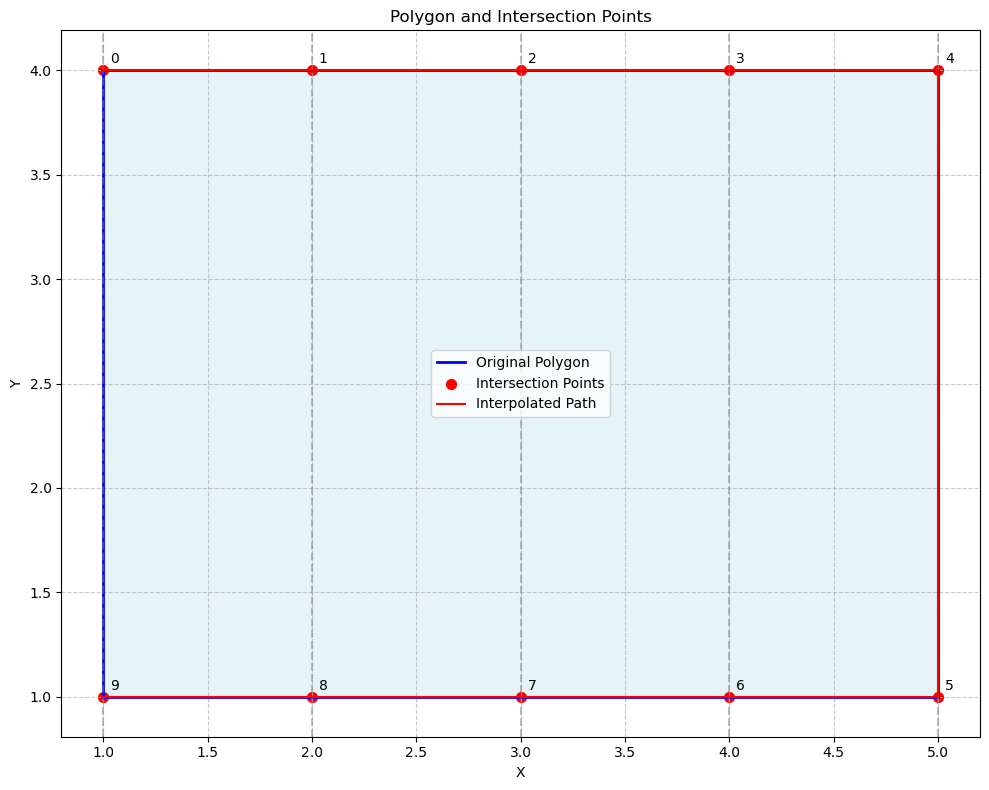

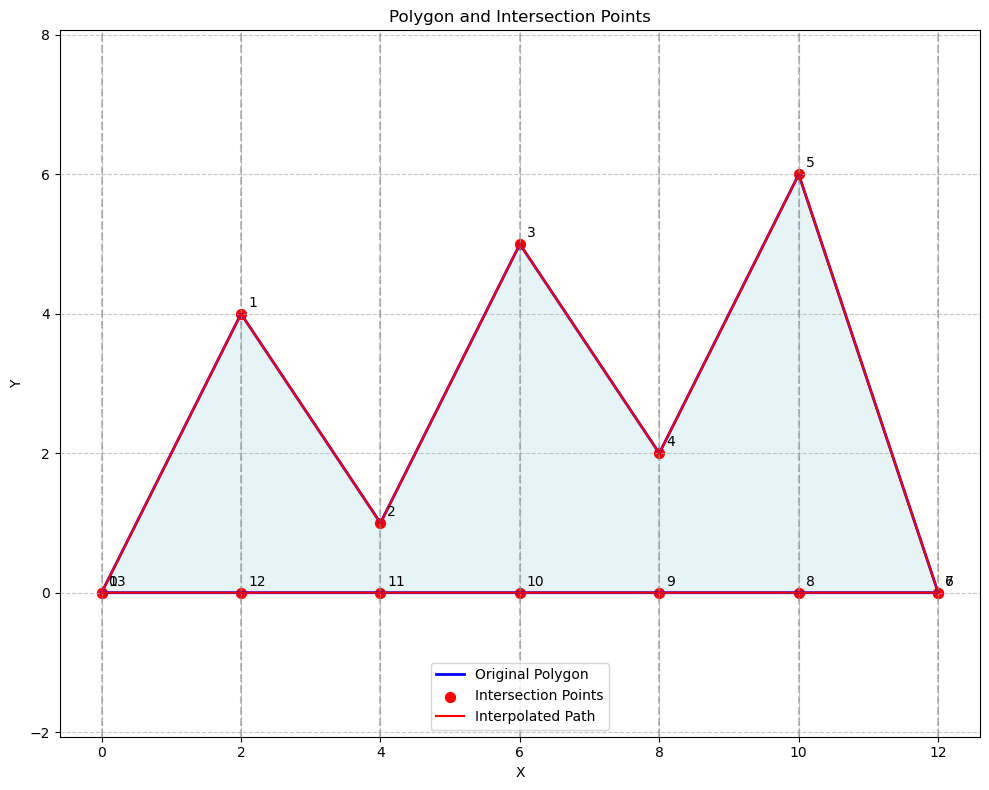

[(0, 0.0), (2, 4.0), (4, 1.0), (6, 5.0), (8, 2.0), (10, 6.0), (12, 0.0), (12, 0.0), (10, 0.0), (8, 0.0), (6, 0.0), (4, 0.0), (2, 0.0), (0, 0.0)]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

def find_polygon_intersections(polygon: List[Tuple[float, float]], x_values: List[float]) -> List[Tuple[float, float]]:
    """
    计算多边形在给定x位置的交点，并按特定顺序排列
    
    参数:
    polygon -- 多边形顶点列表，每个顶点是(x,y)坐标
    x_values -- 需要计算交点的x坐标列表
    
    返回:
    按照从上到下、从左到右、再从右到左顺序排列的交点列表
    """
    # 确保多边形是闭合的
    if polygon[0] != polygon[-1]:
        polygon = polygon + [polygon[0]]
    
    # 存储所有交点
    all_intersections = []
    
    # 对每个x值计算交点
    for x in x_values:
        intersections_at_x = []
        
        # 遍历多边形的每条边
        for i in range(len(polygon) - 1):
            x1, y1 = polygon[i]
            x2, y2 = polygon[i + 1]
            
            # 检查边是否与x垂直线相交
            if min(x1, x2) <= x <= max(x1, x2):
                # 如果边是垂直的
                if x1 == x2:
                    if x == x1:
                        # 将这条垂直边上的所有点都添加为交点
                        y_min, y_max = min(y1, y2), max(y1, y2)
                        intersections_at_x.extend([(x, y_min), (x, y_max)])
                else:
                    # 计算交点的y坐标
                    t = (x - x1) / (x2 - x1)
                    y = y1 + t * (y2 - y1)
                    
                    # 只有当交点不是边的端点，或者是边的左端点时才添加
                    # 这样可以避免重复计算右端点（因为它会作为下一条边的左端点被计算）
                    # 但要特殊处理最后一条边的右端点（即多边形的第一个点）
                    if (t < 1.0) or (i == len(polygon) - 2 and t == 1.0):
                        intersections_at_x.append((x, y))
        
        # 去除重复的交点
        unique_intersections = []
        for point in intersections_at_x:
            if point not in unique_intersections:
                unique_intersections.append(point)
        
        # 如果在这个x位置只有一个交点，则复制它
        if len(unique_intersections) == 1:
            unique_intersections.append(unique_intersections[0])
        
        # 按y坐标排序（从上到下）
        unique_intersections.sort(key=lambda point: -point[1])
        
        # 添加到总交点列表
        all_intersections.extend(unique_intersections)
    
    # 如果没有交点，直接返回空列表
    if not all_intersections:
        return []
    
    # 按x坐标排序所有交点（从左到右）
    all_intersections.sort(key=lambda point: point[0])
    
    # 创建最终的交点列表，按照从上到下、从左到右、再从右到左的顺序
    result = []
    
    # 获取所有不同的x值并排序
    unique_x_values = sorted(set(point[0] for point in all_intersections))
    
    # 从左到右添加上交点
    for x in unique_x_values:
        points_at_x = [p for p in all_intersections if p[0] == x]
        points_at_x.sort(key=lambda point: -point[1])  # 按y坐标从大到小排序
        if points_at_x:
            result.append(points_at_x[0])  # 添加最上面的点
    
    # 从右到左添加下交点
    for x in reversed(unique_x_values):
        points_at_x = [p for p in all_intersections if p[0] == x]
        points_at_x.sort(key=lambda point: point[1])  # 按y坐标从小到大排序
        if points_at_x:
            result.append(points_at_x[0])  # 添加最下面的点
    
    return result

def visualize_polygon_and_intersections(polygon: List[Tuple[float, float]], 
                                        x_values: List[float], 
                                        interpolated_points: List[Tuple[float, float]] = None):
    """
    可视化原始多边形和插值后的结果
    
    参数:
    polygon -- 多边形顶点列表，每个顶点是(x,y)坐标
    x_values -- 计算交点的x坐标列表
    interpolated_points -- 插值后的点列表，如果为None则自动计算
    """
    # 确保多边形是闭合的
    if polygon[0] != polygon[-1]:
        polygon = polygon + [polygon[0]]
    
    # 如果没有提供插值点，则计算它们
    if interpolated_points is None:
        interpolated_points = find_polygon_intersections(polygon, x_values)
    
    # 创建图形
    plt.figure(figsize=(10, 8))
    
    # 绘制原始多边形
    poly_x, poly_y = zip(*polygon)
    plt.plot(poly_x, poly_y, 'b-', linewidth=2, label='Original Polygon')
    plt.fill(poly_x, poly_y, 'lightblue', alpha=0.3)
    
    # 绘制垂直线（用于表示x_values）
    y_min, y_max = plt.ylim()
    y_range = y_max - y_min
    y_min -= 0.1 * y_range
    y_max += 0.1 * y_range
    plt.ylim(y_min, y_max)
    
    for x in x_values:
        plt.axvline(x=x, color='gray', linestyle='--', alpha=0.5)
    
    # 绘制交点
    if interpolated_points:
        int_x, int_y = zip(*interpolated_points)
        plt.scatter(int_x, int_y, color='red', s=50, label='Intersection Points')
        
        # 绘制插值后的路径
        plt.plot(int_x, int_y, 'r-', linewidth=1.5, label='Interpolated Path')
        
        # 添加点的序号标签
        for i, (x, y) in enumerate(interpolated_points):
            plt.annotate(str(i), (x, y), xytext=(5, 5), textcoords='offset points')
    
    # 设置图例和标题
    plt.legend()
    plt.title('Polygon and Intersection Points')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # 保持纵横比相等
    plt.axis('equal')
    
    # 显示图形
    plt.tight_layout()
    plt.show()

# 示例使用
if __name__ == "__main__":
    # 示例1：矩形
    polygon1 = [(1, 1), (5, 1), (5, 4), (1, 4)]
    x_values1 = [1, 2, 3, 4, 5]
    
    # 计算并可视化
    interpolated_points1 = find_polygon_intersections(polygon1, x_values1)
    visualize_polygon_and_intersections(polygon1, x_values1, interpolated_points1)
    
    # 示例2：更复杂的多边形
    polygon2 = [(0, 0), (2, 4), (4, 1), (6, 5), (8, 2), (10, 6), (12, 0)]
    x_values2 = [0, 2, 4, 6, 8, 10, 12]
    
    # 计算并可视化
    interpolated_points2 = find_polygon_intersections(polygon2, x_values2)
    visualize_polygon_and_intersections(polygon2, x_values2, interpolated_points2)
    
    
    print(interpolated_points2)